In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Continuous Random Variables

Now we will introduce continuous random variables. Following a similar pattern to before, we will discuss a few of the basic ideas and then introduce some specific distributions that model common situations and have enough structure to them we can compute with them.

For now, let's assume that our continuous random variable is taking values over the real numbers $\mathbb{R}$ or some subset of the real numbers.

## The Big Problem

So the big difference between discrete random variables and continuous random variables is that for a Discrete Random Variable, the *Probability Distribution Function* gives:

$$P(Y=y) = \mbox{The probability that the discrete random variable Y takes on the value y}$$

Then the probabiliuty that the discrete random variables in an inteval:

$$ P(a \leq Y \leq b) = \sum_{a \leq y \leq b} P(y) $$

## Cumulative Distribution Function

The struggle with a continuous random variable, is that the probability that the variable takes on a particular value must be 0.  This might seem strange, and it will become clearer as we get the structure set up, but the idea is that there is a continuum of values the variable can take and that menas having it land on any one value is impossible.

We need a definition and structure that works for both discrete and continuous random variables. What will work is: Define $F(y)$ to be the *Cumulative Distribution Function*:

$$ F(y) = P(Y \leq y) = \mbox{The probability that Y is less than or equal to y} $$

$F(y)$ has some easy to derive properties for any continuous random variable:

- $0 \leq F(y) \leq 1 $ 
- $F(y)$ is a non-decreasing function (it accumulates the probabilities).

If $y_1 > y_2$ then $$ F(y_1) \geq F(y_2) $$

- $F(y) \to 0 $ as $y \to - \infty$
- $F(y) \to 1 $ as $y \to \infty$

If $Y$ is a discrete random variable, then $F(y)$ has a jump discontinuity when $P(Y = y) \neq 0$. 

A random variable $Y$ is called a continuous random variable if the cummulative distribution function $F(y)$ for it is itself continuous.

## Probability Density Function

The *Probability Density Function* or PDF of a continuous random variable is 

$$ f(y) = \frac{d}{dy} F(y) = F'(y) $$ 

wherever the derivative exists. 

It of course follows from the fundamental theorem of Calculus that

$$ F(y) = \int_{-\infty}^y f(y) dy $$

Provided that $f(y)$ existed.

### What is going on

So as we predicted, the idea of summing over some values to get the probability has indeed turned into integration, with some caveats. The main one being that continuous functions $F(y)$ do not always have derivatives. (It turns out the non-decreasing part helps, but just think about functions with corners). The other problem being that PDF are not exactly the same as Probability Distributions and in particular $f(y)$ is **NOT** $P(y)$.



### Properties of the PDF

The *Probability Density Function* $f(y)$ inherits some properties from $F(y)$:

- $f(y) \geq 0 $ for all y
- $f(y) \to 0 $ for $y \to \pm \infty$ 
- $\int_{-\infty}^\infty f(y) dy = 1 $

## Example: Uniform Random Variable

A definition for uniform random variable would be that the probability, where the density is non zero, of the value being in an interval is proportional to the length of the interval.

Suppose that Y is the continuous random variable with probability density function 

$$ f(y) = \left\{ \begin{matrix} 1 & y \in [0, 1] \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

I.e. every value of y in $[0, 1]$ is equally likely. **Note this is wrong! We need to fix it** 

The probablity that y is in $[a, b]$ for $0 \leq a < b \leq 1 $ is ....



$$ \int_a^b f(y) dy = \int_a^b 1 dy = (b-a) $$

Then the cummulative distribution function is given by the integral of this:

$$ F(y) = \int_{-\infty}^y f(y) dy $$

If $0 < y $

$$ F(y) = \int_0^y f(y) dy $$

If $0< y< 1$:  $$F(y)= \int_0^y 1 dy = y $$

If $y > 1$

$$ F(y) = \int_0^1 1 dy = 1 $$

If y < 0:  $$ F(y) = \int_{-\infty}^y f(y) dy = 0 $$

Summing up:

$$ F(y) = \left\{ \begin{matrix} 0 & y < 0 \\ y & 0 \leq y \leq 1 \\ 1 & y > 1 \end{matrix} \right. $$

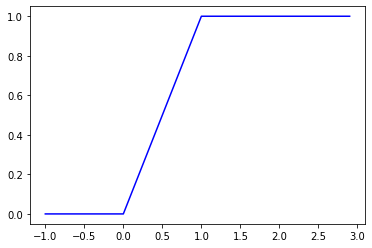

In [4]:
yy = np.arange(-1, 3, 0.1)
def F(y):
    if y<0:
        return 0
    elif y>1:
        return 1
    else:
        return y
    
FF= [ F(y) for y in yy]

plt.plot(yy, FF, 'b-')

## Probability Contribution

Let $Y$ be a continuous random variable with Cummulative Distribution Function $F(y)$ and Probability Density Function $f(y)$ then:

$$ P(a \leq Y \leq b) = F(b) - F(a) = \int_a^b f(y) dy $$

## Example

Let $f(y) = c \sin(\pi y) $ for y on $[0, 1]$ and 0 elswhere:

1. Find the value of $c$ so that $f(y)$ is a valid PDF.

We will choose $c$ so that $\int_{-\infty}^\infty f(y) dy = 1$

I.e. $$ c = \frac{1}{\int_0^1 \sin(\pi y) dy } $$

In [5]:
y = sp.Symbol('y')

In [11]:
sp.integrate(sp.sin(sp.pi * y), (y, 0, 1) )

2/pi

$$ c = \frac{\pi}{2} $$

2. Then find the probability that Y is in [0, 1/4].  

In [19]:
sp.integrate( sp.pi/2 * sp.sin(sp.pi * y), (y, 0, 2) )

0

In [13]:
0.5 - np.sqrt(2)/4

0.1464466094067262

## Expected Values for Continuous Random Variables

The *Expected Value* of a continuous random variable with PDF is:

$$ E(Y) = \int_{-\infty}^\infty y f(y) dy $$

Provided that this integral exists. 

More generally:

$$ E(g(Y)) = \int_{-\infty}^\infty g(y) f(y) dy $$ 

(again provided that the integral exists).

### Variance for Continuous Random Variables

Let $\mu = E(Y)$ then:

$$ \sigma^2 = V(Y) = E( (Y-\mu)^2 ) = \int_{-\infty}^\infty (y-\mu)^2 f(y) dy $$

(provided that this integeral exists).

### Example

Using $f(y) = c \sin(\pi y)$ for y on $[0, 1]$ and 0 elswhere, with c chosen as above. Find the expected value and variance of the corresponding Y. 

In [20]:
sp.integrate( y * sp.pi/2 * sp.sin(sp.pi * y), (y, 0, 1) )

1/2

In [21]:
sp.integrate( (y-1/2)**2 * sp.pi/2 * sp.sin(sp.pi * y), (y, 0, 1)) 

pi*(-2.0/pi**3 + 0.25/pi)/2 - pi*(-0.25/pi + 2.0/pi**3)/2

In [24]:
np.pi*(-2/np.pi**3 + 0.25/np.pi)/2 - np.pi*(- 0.25/np.pi + 2.0 / np.pi**3)/2

0.04735763271532443

## Uniform Distribution

Consider the uniform continuous random variable on the interval $(a, b)$:

$$ f(y) = \left\{ \begin{matrix} \frac{1}{b-a} &  y \in [a, b] \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

Then $$E(Y) = \frac{a+b}{2} $$ and $$\sigma^2 = V(Y) = \frac{(b-a)^2}{12} $$

$$ E(Y) = \int_a^b \frac{1}{b-a} y dy  = \frac{1}{2(b-a)} y^2 |_a^b $$ 

$$ \frac{1}{2(b-a)} \left( b^2 - a^2 \right) = \frac{1}{2(b-a)} (b-a)(b+a) = \frac{b+a}{2} $$